In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("train.csv")
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [3]:
data_info=pd.DataFrame()
data_info['null_number']=data.isnull().sum()
data_info['data_type']=data.dtypes
data_info['total']=data.isnull().count()
data_info['null_percent']=(data_info['null_number']/data_info['total'])*100
data_info

,null_number,data_type,total,null_percent
ID,0,object,245725,0.000000
Gender,0,object,245725,0.000000
Age,0,int64,245725,0.000000
Region_Code,0,object,245725,0.000000
Occupation,0,object,245725,0.000000
Channel_Code,0,object,245725,0.000000
Vintage,0,int64,245725,0.000000
Credit_Product,29325,object,245725,11.934073
Avg_Account_Balance,0,int64,245725,0.000000
Is_Active,0,object,245725,0.000000


###### Initial understanding -- Credit_Product has 11% missing value. However, this can be a trend. --> Need to know, if any other variable/target is related to it?

# Univariate Analysis

#### Gender -- Categorical Variable

In [4]:
# percentage of Male vs Female in the data
data['Gender'].value_counts(normalize=True)*100

Male      54.612677
Female    45.387323
Name: Gender, dtype: float64

###### Decision - Gender is almost evenly distribued.

#### Age -- Continuous Variable

In [5]:
data['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

Skewness is : 0.6189922275209511 right skewed or positively skewed
kurtosis is : -0.44127310457249536 low presence of outliers and thinner tail


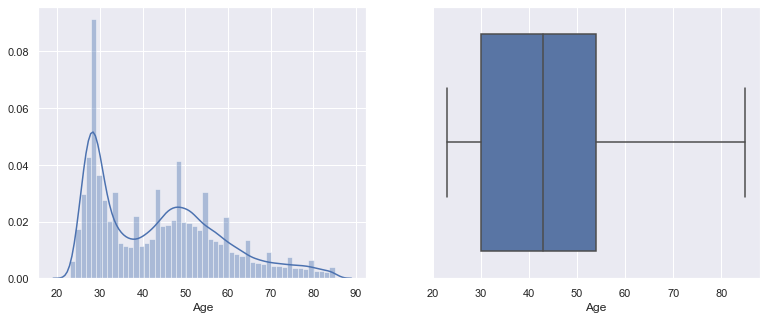

In [6]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(data['Age'])
plt.subplot(1,3,2)
sns.boxplot(data['Age'])
print("Skewness is : " +str(data['Age'].skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(data['Age'].kurtosis()) + " low presence of outliers and thinner tail")
plt.show()

###### We need to transform this value to make it into normal-distribution. We will try log-transform and box-cox

###### Log Transformation

Skewness is : 0.14281996489855647 right skewed or positively skewed
kurtosis is : -1.1368301281711797 low presence of outliers and thinner tail


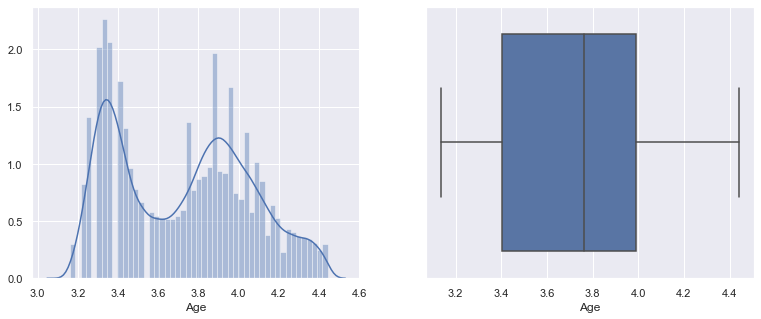

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(np.log(data['Age']))
plt.subplot(1,3,2)
sns.boxplot(np.log(data['Age']))
print("Skewness is : " +str(np.log(data['Age']).skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(np.log(data['Age']).kurtosis()) + " low presence of outliers and thinner tail")
plt.show()

###### Almost but still not there. Let us use Box-Cox now . Note - We can use Box-Cox here as all the values are > 0

value of lambda is : -0.26394551696622603


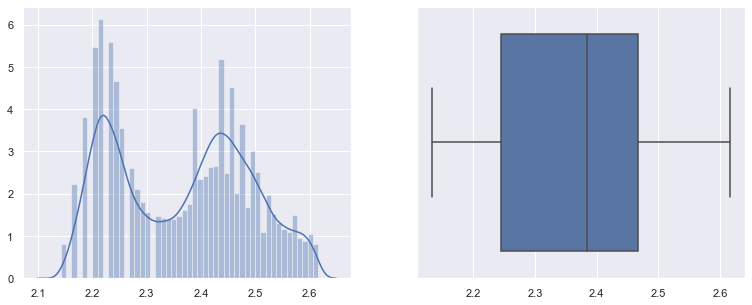

In [8]:
from scipy import stats
xt, lamda = stats.boxcox(data['Age'])
print("value of lambda is : "+str(lamda))
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(xt)
plt.subplot(1,3,2)
sns.boxplot(xt)
plt.show()

#### Region_Code -- Categorical variable

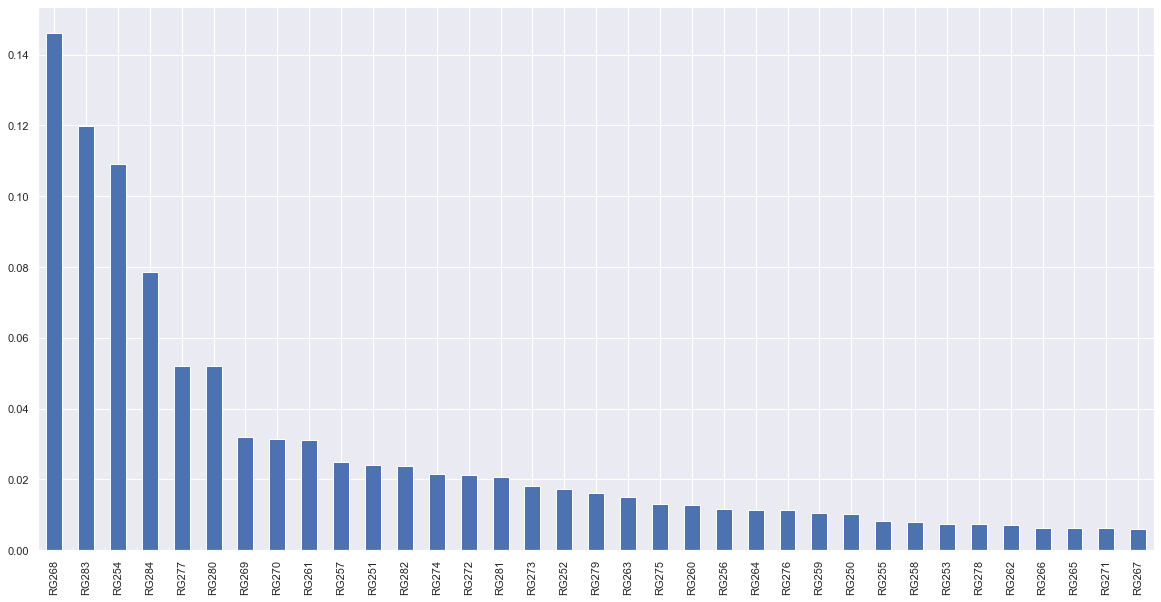

In [9]:
plt.figure(figsize=(20,10))
data['Region_Code'].value_counts(normalize=True).plot.bar()

###### Decision - Maximum customer are of RG268 and data is extremely biased towards this region. most of the other regions have almost equal presence. Might have some relation on the data-collection, even on the taret-variable.

#### Occupation - Categorical Variable

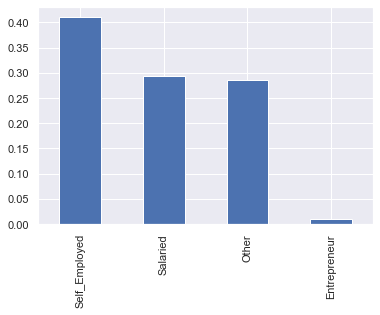

In [10]:
data['Occupation'].value_counts(normalize=True).plot.bar()

###### Decision-
1. Majority of perople are Self_Employed. 
2. Salaried and Other have almost same occurance.
3. Entrepreneur is similar to Self-Employed. We might need to sum them up.

#### Channel_Code -- Categorical Variable

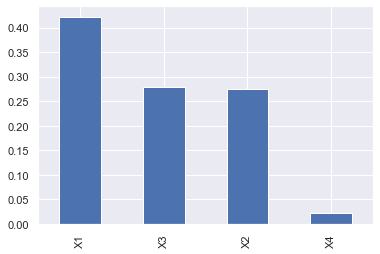

In [11]:
data['Channel_Code'].value_counts(normalize=True).plot.bar()

###### Decision:-
1. This distribution looks similar to Occupation. Might have a relation between them. We will check that in the Bivariate Analysis.
2. X1 has more presence that others
3. X2 and X3 are almost similar presence.
4. X4 is almost negligible. If we can add X4 and X1, just like Occupation, then we might benefit. However, this will be a decision based on Occupation vs. Channel_Code analysis.

#### Vintage -- Numerical Variable

In [12]:
data['Vintage'].describe()

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

Skewness is : 0.7901885721179357 right skewed or positively skewed
kurtosis is : -0.6965397143505938 low presence of outliers and thinner tail


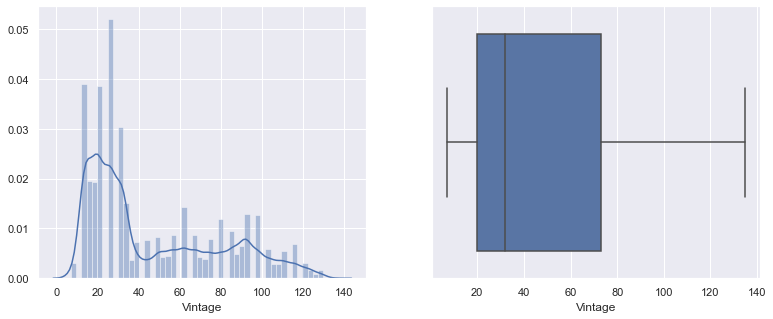

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(data['Vintage'])
plt.subplot(1,3,2)
sns.boxplot(data['Vintage'])
print("Skewness is : " +str(data['Vintage'].skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(data['Vintage'].kurtosis()) + " low presence of outliers and thinner tail")
plt.show()

##### Log Transformation

Skewness is : 0.10966289434574678 right skewed or positively skewed
kurtosis is : -1.2282144078624142 low presence of outliers and thinner tail


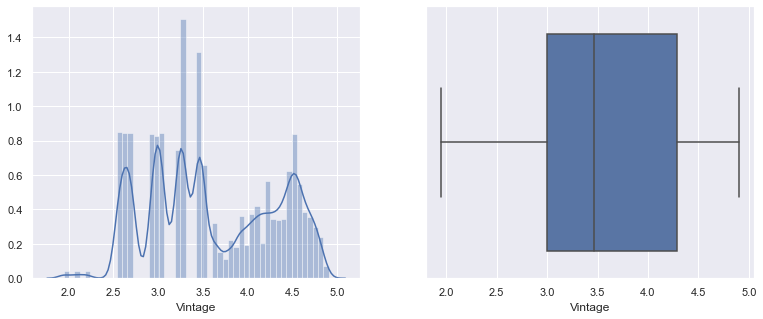

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(np.log(data['Vintage']))
plt.subplot(1,3,2)
sns.boxplot(np.log(data['Vintage']))
print("Skewness is : " +str(np.log(data['Vintage']).skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(np.log(data['Vintage']).kurtosis()) + " low presence of outliers and thinner tail")
plt.show()

###### Decision:-
1. Data is very much biased towards low vintage customers.
2. Outliers do not seem to be present.
3. Can not Transform this column, Will try for Binning.

#### Credit_Product -- categorical variable -- has null values

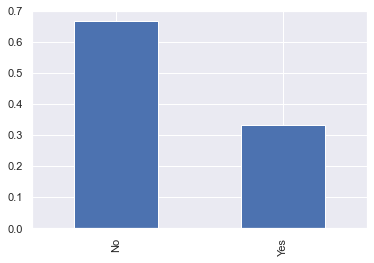

In [15]:
data['Credit_Product'].value_counts(normalize=True).plot.bar()
plt.show()

###### Let us fill the null values with Zero and recheck the distribution. We are filling it with Zero, so that we can easily identify them in future.

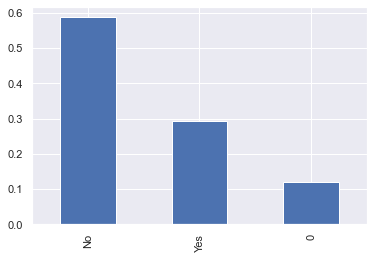

In [16]:
data['Credit_Product']=data['Credit_Product'].fillna('0')
data['Credit_Product'].value_counts(normalize=True).plot.bar()
plt.show()

###### Decision -
We have around 11% of the data, where values are not provided. If not necessary, we can delete them. But we need to identify if there is any hidden parity between them. We will check the relation between variables in Bivariate.

#### Avg_Account_Balance -- numerical variable

In [17]:
data['Avg_Account_Balance'].describe()/1000  ## this will be perK value

count      245.725000
mean      1128.403101
std        852.936356
min         20.790000
25%        604.310000
50%        894.601000
75%       1366.666000
max      10352.009000
Name: Avg_Account_Balance, dtype: float64

Skewness is : 2.968726515557337 right skewed or positively skewed
kurtosis is : 14.304593837580077 Extremely high presence of outliers


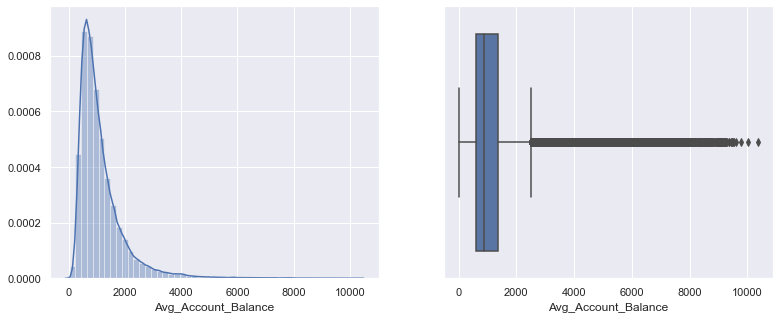

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot((data['Avg_Account_Balance']/1000))
plt.subplot(1,3,2)
sns.boxplot((data['Avg_Account_Balance']/1000))
print("Skewness is : " +str(data['Avg_Account_Balance'].skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(data['Avg_Account_Balance'].kurtosis()) + " Extremely high presence of outliers")
plt.show()

###### Extremely high bias towards lower values and kurtosis value sugests that we have a high presence of outliers. Need to remove them first.

In [19]:
df1=data[data['Avg_Account_Balance'] < 2.5 * data['Avg_Account_Balance'].std()]
df2=data[data['Avg_Account_Balance'] >= 2.5 * data['Avg_Account_Balance'].std()]
df1.ID.count(), (df1.ID.count()/data.ID.count())*100, df2.ID.count(), (df2.ID.count()/data.ID.count())*100

(223669, 91.0241123206837, 22056, 8.97588767931631)

Skewness is : 0.6899628449305711 right skewed or positively skewed
kurtosis is : -0.24653003764324843 Extremely high presence of outliers


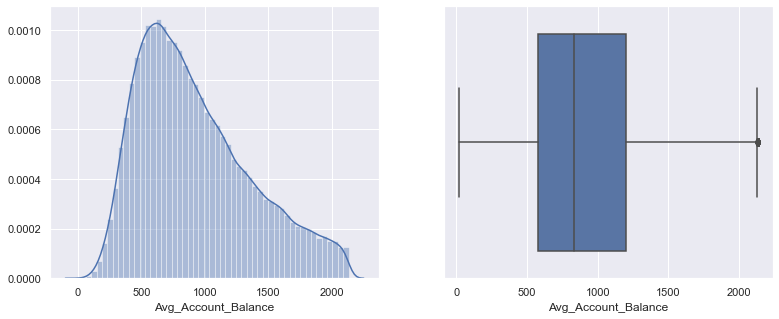

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot((df1['Avg_Account_Balance']/1000))
plt.subplot(1,3,2)
sns.boxplot((df1['Avg_Account_Balance']/1000))
print("Skewness is : " +str(df1['Avg_Account_Balance'].skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(df1['Avg_Account_Balance'].kurtosis()) + " Extremely high presence of outliers")
plt.show()

###### data seems almost bell-shaped after removing the outliers with 2.5 times of Standard-Deviation. But we are also looing value for large customer data.

###### Now to try a Log transformation and check how it will behave

Skewness is : 0.2351775282236966 right skewed or positively skewed
kurtosis is : 0.3060334973671188low presence of outliers
Standard Deviation is : 0.6197575308147731


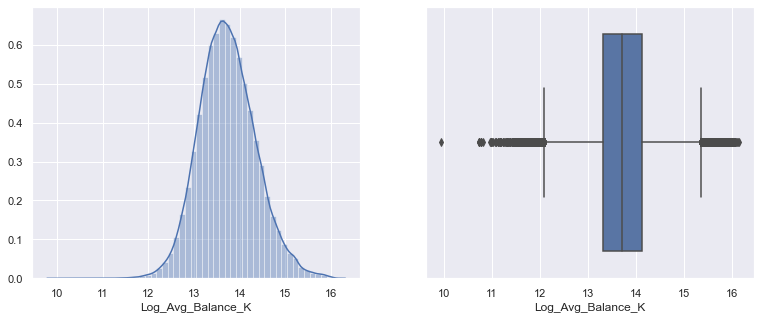

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
data['Log_Avg_Balance_K']=np.log(data['Avg_Account_Balance'])
sns.distplot(data['Log_Avg_Balance_K'])
plt.subplot(1,3,2)
sns.boxplot(data['Log_Avg_Balance_K'])
print("Skewness is : " +str(data['Log_Avg_Balance_K'].skew())+" right skewed or positively skewed")
print("kurtosis is : " +str(data['Log_Avg_Balance_K'].kurtosis()) + "low presence of outliers")
print("Standard Deviation is : " +str(data['Log_Avg_Balance_K'].std()))
plt.show()

12.087784482318344
15.351726813043932


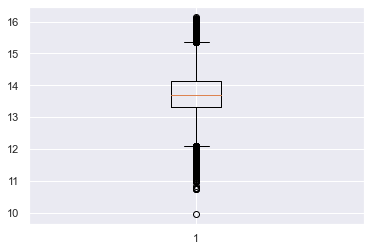

In [22]:
# identifying whiskers in the graph
B = plt.boxplot(data['Log_Avg_Balance_K'])
for item in B['whiskers']:
    print(item.get_ydata()[1])  # item.get_ydata() returns a 2-D array

In [23]:
# oour left whisker is 12.087784482318344 and right whisker is 15.351726813043932
df1=data[(data['Log_Avg_Balance_K'] > 12.087784482318344) & (data['Log_Avg_Balance_K'] < 15.351726813043932)]
df2=data[(data['Log_Avg_Balance_K'] < 12.087784482318344) | (data['Log_Avg_Balance_K'] > 15.351726813043932)]
df1.ID.count(), (df1.ID.count()/data.ID.count())*100, df2.ID.count(), (df2.ID.count()/data.ID.count())*100

(242726, 98.77952996235629, 2997, 1.2196561196459457)

###### Decision - 
1. We need to transfrom into Log and remove the outliers.
2. We already have the outlier values and df1 is the current correct data

#### Is_Active -- Categorical Variable

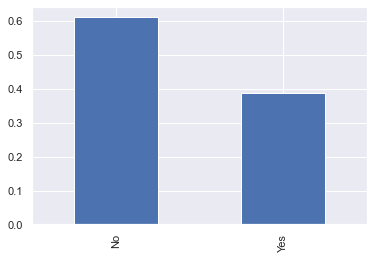

In [24]:
data['Is_Active'].value_counts(normalize=True).plot.bar()
plt.show()

###### We have 60% customers who have not done anything in the lat three months and only 40% were active within last 3 months.

#### Is_Lead -- Categorical Variable

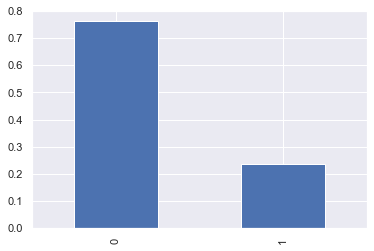

In [25]:
data['Is_Lead'].value_counts(normalize=True).plot.bar()
plt.show()

###### Nearly 80% of the people declined the product. This means we are working on a data, which is highly biased towards declining. It also means that naively assuming everyone will decline will still give me a 80% success rate and hence, our model must perform more than 90% corrected.

### Bivariate Analysis:-

#### Hypotheis 1 - is Male customers more likely to decline than Female Customers?

In [26]:
(data.groupby(['Gender','Is_Lead']).Is_Lead.count()/data.ID.count())*100

Gender  Is_Lead
Female  0          36.147319
        1           9.240004
Male    0          40.131855
        1          14.480822
Name: Is_Lead, dtype: float64

###### 40% of male customers are declining whereas 36% of female custmers are declining. The same 5% diff is present in accepting results as well. hence, We can safely say that Gender only does not play a good role in determining the outcome.

#### Hypothesis 2 - is younger people more accepting the credit product?

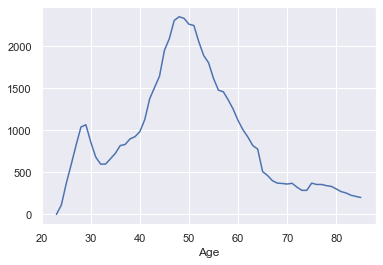

In [27]:
# grouping by Age and then summing up Is_Lead, to give us an idea of how much of people accepted
data.groupby(['Age']).Is_Lead.sum().plot()

###### we can see that people within 20-30 and 40-60 are more susceptible to accept the credit-card. 30-40 and 60+ are not accepting that much. Hence, we can conclude that Age will play a good role in this. 
However, it might be a good Idea for binning the age-values into group,

20-30 --> Early youth --> name it as 20-to-30 or 23

30-40 --> Late youth --> name it as 30-to-40 or 34

40-50 --> middle age --> name it as 40-to-50 or 45

50-60 --> Late Age --> name it as 50-to-60 or 56

60-70 --> Senior --> name it as 67

70-80 --> late Senior --> name it as 78

80+ --> Very Senior --> name it as 80

In [28]:
## assigning the values as per pur assumptions
data=data.assign(Age_Group = data['Age'].apply(lambda x : 23 if (x>=20 and x<30)
                                               else (34 if (x>=30 and x<40)
                                                     else (45 if (x>=40 and x<50)
                                                           else (56 if (x>=50 and x<60)
                                                                 else (67 if (x>=60 and x<70)
                                                                       else (78 if (x>=70 and x<80)
                                                                             else 80)))))))
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Log_Avg_Balance_K,Age_Group
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,13.860193,78
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,13.274205,34
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,14.210464,56
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,13.061453,34
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,13.695360,34


In [29]:
## Checking the percentage of acceptance based on Age_Group, against the whole data
(data.groupby(['Age_Group','Is_Lead']).Is_Lead.count()/data.ID.count())*100

Age_Group  Is_Lead
23         0          21.600570
           1           1.626208
34         0          18.188219
           1           3.092074
45         0          13.699054
           1           7.190559
56         0          12.167667
           1           7.087598
67         0           5.956252
           1           2.747380
78         0           3.463221
           1           1.377963
80         0           1.204192
           1           0.599044
Name: Is_Lead, dtype: float64

In [30]:
## checking the percentage against each group's count()
(data.groupby(['Age_Group','Is_Lead']).Is_Lead.count()/data.groupby(['Age_Group']).Age_Group.count())*100

Age_Group  Is_Lead
23         0          92.998563
           1           7.001437
34         0          85.469775
           1          14.530225
45         0          65.578306
           1          34.421694
56         0          63.191377
           1          36.808623
67         0          68.434095
           1          31.565905
78         0          71.536651
           1          28.463349
80         0          66.779508
           1          33.220492
dtype: float64

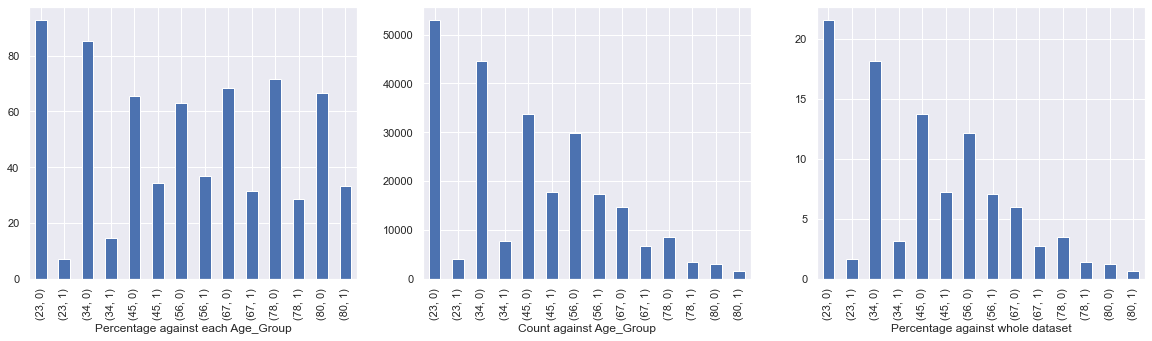

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
((data.groupby(['Age_Group','Is_Lead']).Is_Lead.count()/data.groupby(['Age_Group']).Age_Group.count())*100).plot.bar()
plt.xlabel('Percentage against each Age_Group')
plt.subplot(1,3,2)
(data.groupby(['Age_Group','Is_Lead']).Is_Lead.count()).plot.bar()
plt.xlabel('Count against Age_Group')
plt.subplot(1,3,3)
((data.groupby(['Age_Group','Is_Lead']).Is_Lead.count()/data.ID.count())*100).plot.bar()
plt.xlabel('Percentage against whole dataset')
plt.show()

###### Age certainly plays a great role and infact credit-product acceptance increases as a person grows towards Seniority and maximum acceptance seems to be around 50 years of age. 

#### We can also decide hereby that, we should be using the Age_Group rather Age in the modeling part.

### Hypothesis 3 -- Is Region_Code influencing the acceptance? 
Since we have seen that, some of the regions have more information available than others, i.e. data is biased for those regions, we need to take the percentage based on individual region_code's count

In [32]:
## checking the percentage against each group's count()
(data.groupby(['Region_Code','Is_Lead']).Is_Lead.count()/data.groupby(['Region_Code']).Region_Code.count())*100

Region_Code  Is_Lead
RG250        0          84.254808
             1          15.745192
RG251        0          76.789916
             1          23.210084
RG252        0          86.187587
                          ...    
RG282        1          19.214273
RG283        0          69.795349
             1          30.204651
RG284        0          69.896480
             1          30.103520
Length: 70, dtype: float64

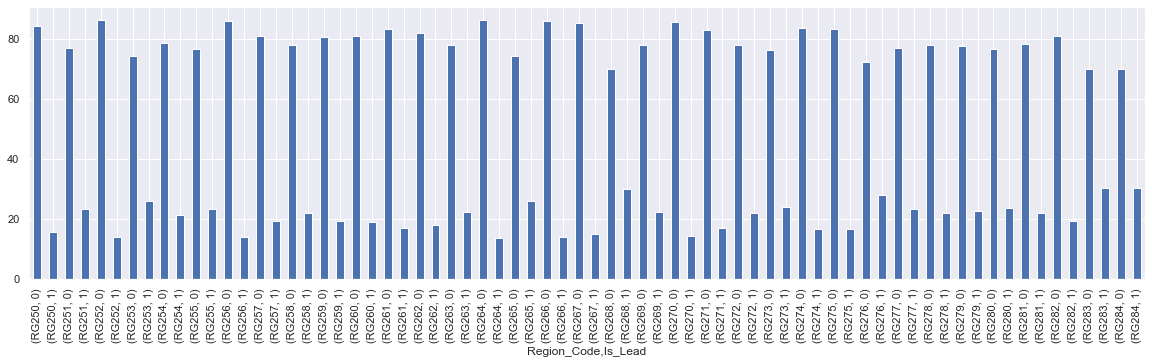

In [33]:
## Let's place it under a graph for more smooting effect
plt.figure(figsize=(20,5))
((data.groupby(['Region_Code','Is_Lead']).Is_Lead.count()/data.groupby(['Region_Code']).Region_Code.count())*100).plot.bar()
plt.show()

###### This seems to be equally distributed between regions. all the acceptance percentage seems to be within 15-25% for all the regions, except 268, 283 and 284, where the peak reaches around 30. These are also part of the regions, where most of the data were collected. However, rejection percentage in these regions are pretty low.

#### Hypothesis 4 -- Salaried Employees might not have more Credit-Cards

In [34]:
## checking the percentage against each group's count()
(data.groupby(['Occupation','Is_Lead']).Is_Lead.count()/data.groupby(['Occupation']).Occupation.count())*100

Occupation     Is_Lead
Entrepreneur   0          33.933258
               1          66.066742
Other          0          75.504824
               1          24.495176
Salaried       0          84.033112
               1          15.966888
Self_Employed  0          72.403505
               1          27.596495
dtype: float64

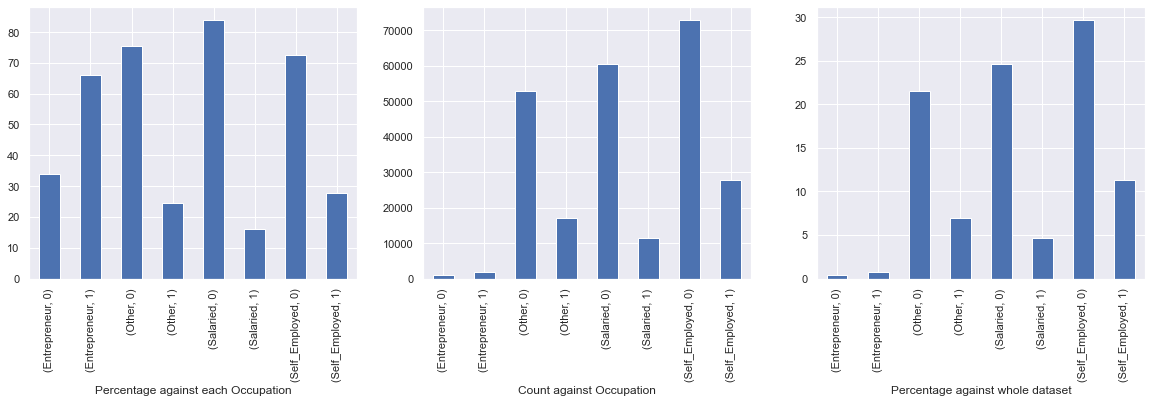

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
((data.groupby(['Occupation','Is_Lead']).Is_Lead.count()/data.groupby(['Occupation']).Occupation.count())*100).plot.bar()
plt.xlabel('Percentage against each Occupation')
plt.subplot(1,3,2)
(data.groupby(['Occupation','Is_Lead']).Is_Lead.count()).plot.bar()
plt.xlabel('Count against Occupation')
plt.subplot(1,3,3)
((data.groupby(['Occupation','Is_Lead']).Is_Lead.count()/data.ID.count())*100).plot.bar()
plt.xlabel('Percentage against whole dataset')
plt.show()

###### It seems that  Entrepreneurs have more acceptance on Credit-Products rather any other. Where as Self-Employed are not that much Credit-accepting group. We should not waste this treat and we hence, should not merge entrepreneurs with Self-Employed. Salaried and Other occupations are close to each other and it seems salaried would be having least interst in Creidt-Products

### Hypothesis 5 - Channel_Code should not play a big role a Outcome

In [36]:
## checking the percentage against each group's count()
(data.groupby(['Channel_Code','Is_Lead']).Is_Lead.count()/data.groupby(['Channel_Code']).Channel_Code.count())*100

Channel_Code  Is_Lead
X1            0          90.857903
              1           9.142097
X2            0          67.210525
              1          32.789475
X3            0          63.297532
              1          36.702468
X4            0          75.219968
              1          24.780032
dtype: float64

In [37]:
data.groupby(['Channel_Code','Is_Lead']).Is_Lead.count()

Channel_Code  Is_Lead
X1            0          94236
              1           9482
X2            0          45519
              1          22207
X3            0          43493
              1          25219
X4            0           4189
              1           1380
Name: Is_Lead, dtype: int64

###### It seems Channel_Code also plays a good role in determining outcome as X1 is almost not able derive anything. where as X2 and X3 are almost deriving similar result. X4 is low than X2 and X3 but yields significant result.

### Hypothesis 6 - Customers, associated more with the bank, are more accepting credit product

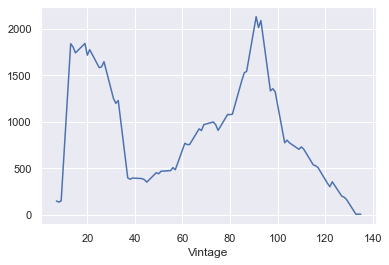

In [38]:
# grouping by Vintage and then summing up Is_Lead, to give us an idea of how much of people accepted
data.groupby(['Vintage']).Is_Lead.sum().plot()

###### people seem to be accepting credit products more with early relations and then around 3-4 years of relation
We would bin the relation based 2 years of data.

00-24 --> 02 --> first two years

24-48 --> 24 --> 2-4 years

48-72 --> 46 --> 4-6 years

72-96 --> 68 --> 6-8 years

96-120--> 81 --> 8-10 years

120+ --> 99 --> 10+ years

In [39]:
## assigning the values as per pur assumptions
data=data.assign(Vintage_Group = data['Vintage'].apply(lambda x : 2 if (x>=0 and x<24)
                                               else (24 if (x>=24 and x<48)
                                                     else (46 if (x>=48 and x<72)
                                                           else (68 if (x>=72 and x<96)
                                                                 else (81 if (x>=96 and x<120)
                                                                       else 99))))))
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Log_Avg_Balance_K,Age_Group,Vintage_Group
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,13.860193,78,24
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,13.274205,34,24
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,14.210464,56,24
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,13.061453,34,2
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,13.695360,34,24


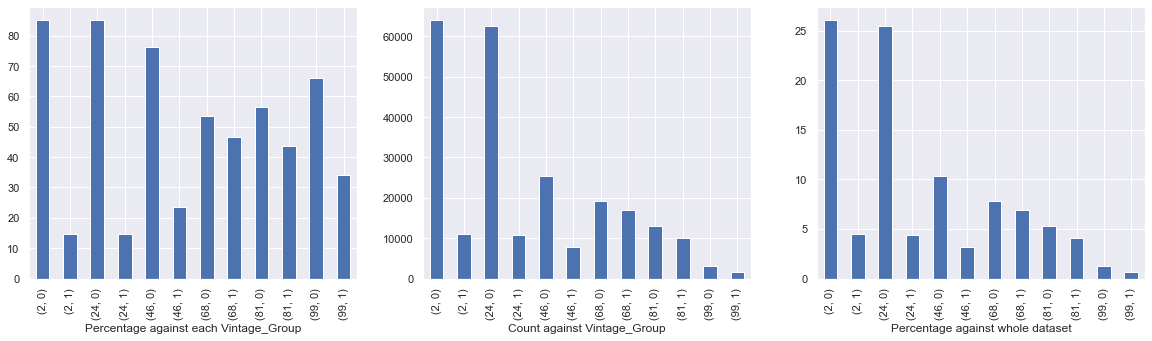

In [40]:
## plotting the percentage values on graph to understand the effect of Vintage on outcome
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
((data.groupby(['Vintage_Group','Is_Lead']).Is_Lead.count()/data.groupby(['Vintage_Group']).Vintage_Group.count())*100).plot.bar()
plt.xlabel('Percentage against each Vintage_Group')
plt.subplot(1,3,2)
(data.groupby(['Vintage_Group','Is_Lead']).Is_Lead.count()).plot.bar()
plt.xlabel('Count against Vintage_Group')
plt.subplot(1,3,3)
((data.groupby(['Vintage_Group','Is_Lead']).Is_Lead.count()/data.ID.count())*100).plot.bar()
plt.xlabel('Percentage against whole dataset')
plt.show()

###### We have more data on the first 4 years and hence the acceptance count was abruptly shot high on the first few years. however, on individual percentages, it seems that acceptance increases till 6-8 years and then slowly decreases. But customers with more than 10 years of relation are always more accepting more credit-cards than first years.

#### Let us change all the categorical variables to nemerical and have a look again.

In [41]:
# We alrady know that Age and Vintage have redundancy with Age_Group and Vintage_Group and hence, needs to be dropped.
# this same is for Log_Avg_Balance_K as we would not use the log-transformed value any more
df=data[(data['Log_Avg_Balance_K'] > 12.087784482318344) & (data['Log_Avg_Balance_K'] < 15.351726813043932)]
df=df.drop(['Age','Vintage', 'Avg_Account_Balance'], axis=1)

In [45]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
df['Occupation'].replace({'Entrepreneur':0, 'Other':1, 'Salaried':2, 'Self_Employed':3}, inplace=True)
df['Channel_Code'].replace({'X1':0, 'X2':1, 'X3':2, 'X4':3}, inplace=True)
df['Is_Active'].replace({'Yes':1, 'No':0}, inplace=True)

### We need to check if the Credit_Product has any hidden trait

###### We will be checking each individual field with or without Credit_Product. If the values vary significantly, we can confirm it has a hidden_trait

Text(0.5, 0, 'Non Null Values distribution')

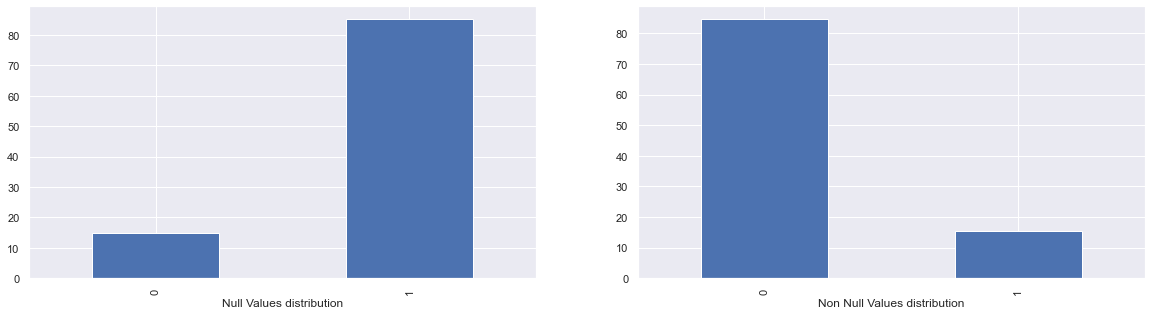

In [46]:
# Starting with Target Variable
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
(data[data['Credit_Product']=='0'].groupby('Is_Lead').Is_Lead.count()/data[data['Credit_Product']=='0'].Is_Lead.count()*100).plot.bar()
plt.xlabel("Null Values distribution")
plt.subplot(1,2,2)
(data[data['Credit_Product']!='0'].groupby('Is_Lead').Is_Lead.count()/data[data['Credit_Product']!='0'].Is_Lead.count()*100).plot.bar()
plt.xlabel("Non Null Values distribution")

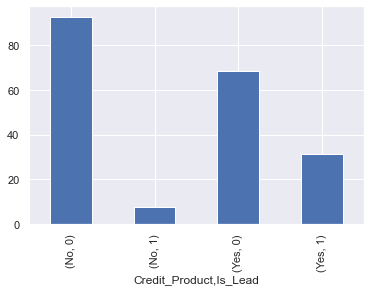

In [47]:
## we will be checking if this null distribution mimics any existing value

(data[data['Credit_Product']!='0'].groupby(['Credit_Product','Is_Lead']).Is_Lead.count()/data[data['Credit_Product']!='0'].groupby('Credit_Product').Is_Lead.count()*100).plot.bar()

In [48]:
## None of the existing values show similar distribution. Hence we will treat it as a separate value altogether.
df['Credit_Product'].replace({'Yes':0,'No':1,'0':2},inplace=True)

## Check for Multicollinearity

#### Heatmap for numerical valriables
We have intentionally made the groups with numbers so that we can sort them based on growth

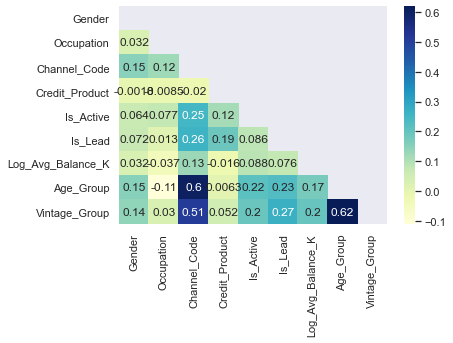

In [49]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))

# plotting a triangle correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

###### Vintage_Group might have a relation with Channel_Code and Age_Group.
Age_Group and Vintage_Group might have a linear relation as, customer is expected to be aged to have a more vintage account

## Pre-processing

###### We need to under-sample the dominant 0 values of Is_Lead.

In [50]:
## We will delete the ID and Region_Code as both of them would not play a role in our context
data_pre = df.drop(['ID','Region_Code'],axis=1)

#import
from sklearn.utils import resample

#undersample based on Is-Lead = 1. This will sample the similar number of 0-s as 1-s
data_pre_resampled = resample(data_pre[data_pre['Is_Lead']==0], n_samples=data_pre[data_pre['Is_Lead']==1].shape[0])

#create final pre-processing dataset
data_preproc=pd.concat([data_pre_resampled,data_pre[data_pre['Is_Lead']==1]])

#check for the values
data_preproc['Is_Lead'].value_counts()

1    57621
0    57621
Name: Is_Lead, dtype: int64

In [51]:
#droping target-variable for the pre
X=data_preproc.drop('Is_Lead', axis=1)
Y=data_preproc['Is_Lead']

# Splitting to Training and Test
from sklearn.model_selection import train_test_split

# train-Test Split
train_x, test_x , train_y, test_y = train_test_split(X, Y, stratify=Y, test_size=0.6)

#further splitting of train into training and validation set
tr_x, val_x , tr_y, val_y = train_test_split(train_x, train_y, stratify=train_y, test_size=0.5)

#check the shape once
train_x.shape, test_x.shape, train_y.shape, test_y.shape, tr_x.shape, val_x.shape , tr_y.shape, val_y.shape

((46096, 8),
 (69146, 8),
 (46096,),
 (69146,),
 (23048, 8),
 (23048, 8),
 (23048,),
 (23048,))

## Training Model and data validation

##### Decission Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_acc=[]
val_acc=[]

# this loop will check for score for every tree-depth values of 1-15 
for depth in range(1,15):
    model=DecisionTreeClassifier(max_depth=depth, random_state=11)
    model.fit(tr_x,tr_y)
    pred_prob=model.predict_proba(tr_x)
    auc_score_tr=roc_auc_score(tr_y, pred_prob[:,1])
    train_acc.append(auc_score_tr)
    pred_prob=model.predict_proba(val_x)
    auc_score_val=roc_auc_score(val_y, pred_prob[:,1])
    val_acc.append(auc_score_val)

Text(0, 0.5, 'Tree Depth')

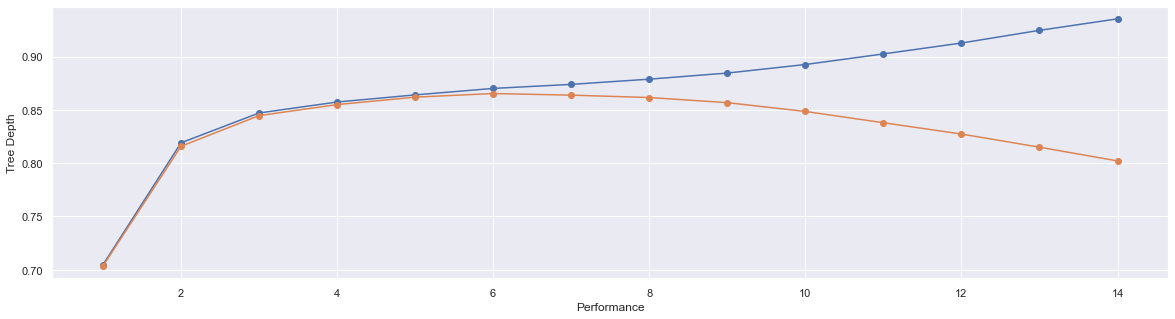

In [53]:
# put the data into dataframe for plotting
df=pd.DataFrame({'depth':range(1,15), 'training_auc_score':train_acc, 'validation_auc_score':val_acc})

# plot data
plt.figure(figsize=(20,5))
plt.plot(df['depth'], df['training_auc_score'], marker='o')
plt.plot(df['depth'], df['validation_auc_score'], marker='o')
plt.xlabel('Performance')
plt.ylabel('Tree Depth')

In [54]:
# We will settle for 5

model_dt=DecisionTreeClassifier(max_depth=5)
model_dt.fit(train_x,train_y)
pred_prob=model_dt.predict_proba(train_x)
auc_score=roc_auc_score(train_y, pred_prob[:,1])
print("Decision Tree Training Score = " + str(auc_score))
pred_prob=model_dt.predict_proba(test_x)
auc_score=roc_auc_score(test_y, pred_prob[:,1])
print("Decision Tree Test Score = " + str(auc_score))

Decision Tree Training Score = 0.8638414447999865
Decision Tree Test Score = 0.8608518552619272


##### XGBoost

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

train_acc=[]
val_acc=[]

# check for different estimators given a fixed max-depth=6
for i in range(1,20):
    model=XGBClassifier(n_estimators=i, max_depth=5, random_state=11)
    model.fit(tr_x,tr_y)
    pred_prob=model.predict_proba(tr_x)
    auc_score_tr=roc_auc_score(tr_y, pred_prob[:,1])
    train_acc.append(auc_score_tr)
    pred_prob=model.predict_proba(val_x)
    auc_score_val=roc_auc_score(val_y, pred_prob[:,1])
    val_acc.append(auc_score_val)

[12:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Text(0, 0.5, 'Tree number')

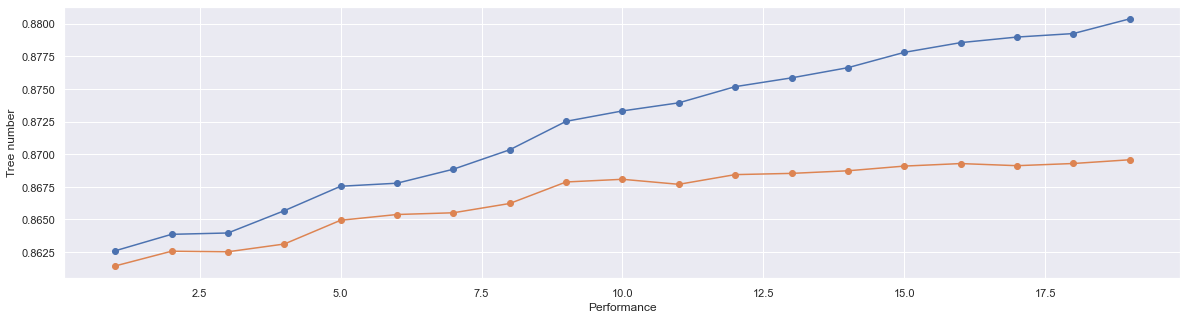

In [56]:
# Arrange scoreinto dataframe for plotting
df=pd.DataFrame({'trees':range(1,20), 'training_auc_score':train_acc, 'validation_auc_score':val_acc})

#plot into graph
plt.figure(figsize=(20,5))
plt.plot(df['trees'], df['training_auc_score'], marker='o')
plt.plot(df['trees'], df['validation_auc_score'], marker='o')
plt.xlabel('Performance')
plt.ylabel('Tree number')

In [57]:
train_acc=[]
val_acc=[]

# This will check for scores for each max_depth given a fixed nummber of trees = 11
for i in range(1,20):
    model=XGBClassifier(n_estimators=5, max_depth=i, random_state=11)
    model.fit(tr_x,tr_y)
    pred_prob=model.predict_proba(tr_x)
    auc_score_tr=roc_auc_score(tr_y, pred_prob[:,1])
    train_acc.append(auc_score_tr)
    pred_prob=model.predict_proba(val_x)
    auc_score_val=roc_auc_score(val_y, pred_prob[:,1])
    val_acc.append(auc_score_val)

[12:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Text(0, 0.5, 'Tree depth')

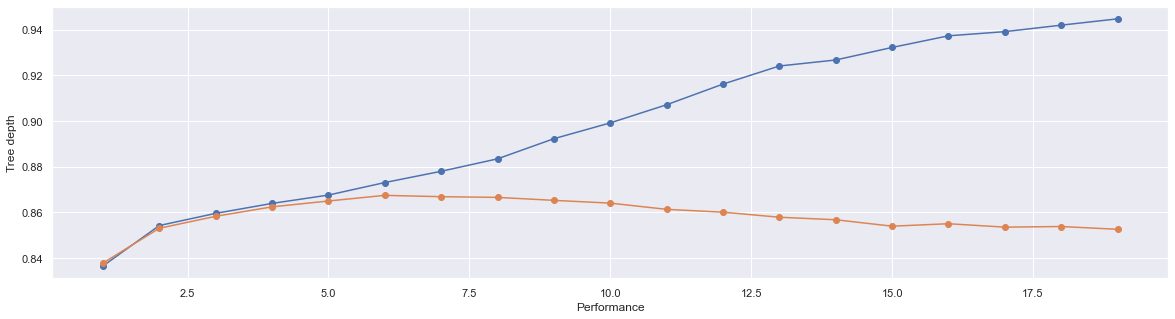

In [58]:
# Arrange scoreinto dataframe for plotting
df=pd.DataFrame({'depth':range(1,20), 'training_auc_score':train_acc, 'validation_auc_score':val_acc})

#plot into graph
plt.figure(figsize=(20,5))
plt.plot(df['depth'], df['training_auc_score'], marker='o')
plt.plot(df['depth'], df['validation_auc_score'], marker='o')
plt.xlabel('Performance')
plt.ylabel('Tree depth')

In [59]:
# we will settle for trees=11 and max_depth=5
model_xgb=XGBClassifier(n_estimators=5, max_depth=5)
model_xgb.fit(train_x,train_y)
pred_prob=model_xgb.predict_proba(train_x)
auc_score=roc_auc_score(train_y, pred_prob[:,1])
print("XGB Train = " + str(auc_score))
pred_prob=model_xgb.predict_proba(test_x)
auc_score=roc_auc_score(test_y, pred_prob[:,1])
print("XGB Test = " + str(auc_score))

[12:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Train = 0.8673395988945275
XGB Test = 0.8644495258029887


### Test Prediction

In [63]:
test=pd.read_csv("test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [64]:
# Format the column values like we did in Training Dataset

## Age
test=test.assign(Age_Group = test['Age'].apply(lambda x : 23 if (x>=20 and x<30)
                                               else (34 if (x>=30 and x<40)
                                                     else (45 if (x>=40 and x<50)
                                                           else (56 if (x>=50 and x<60)
                                                                 else (67 if (x>=60 and x<70)
                                                                       else (78 if (x>=70 and x<80)
                                                                             else 80)))))))
# Fill Credit_Product
test['Credit_Product']=test['Credit_Product'].fillna('0')

## Vintage
test=test.assign(Vintage_Group = test['Vintage'].apply(lambda x : 2 if (x>=0 and x<24)
                                               else (24 if (x>=24 and x<48)
                                                     else (46 if (x>=48 and x<72)
                                                           else (68 if (x>=72 and x<96)
                                                                 else (81 if (x>=96 and x<120)
                                                                       else 99))))))

## Average_Account_Balance
test['Log_Avg_Balance_K']=np.log(test['Avg_Account_Balance'])

# drop unused variables
test=test.drop(['Age','Vintage','Avg_Account_Balance'], axis=1)

# Transform other categorical variables
test['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
test['Occupation'].replace({'Entrepreneur':0, 'Other':1, 'Salaried':2, 'Self_Employed':3}, inplace=True)
test['Channel_Code'].replace({'X1':0, 'X2':1, 'X3':2, 'X4':3}, inplace=True)
test['Is_Active'].replace({'Yes':1, 'No':0}, inplace=True)
test['Credit_Product'].replace({'Yes':0,'No':1,'0':2},inplace=True)

test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Age_Group,Vintage_Group,Log_Avg_Balance_K
0,VBENBARO,1,RG254,1,0,0,0,23,24,13.517598
1,CCMEWNKY,1,RG268,1,1,2,0,45,46,13.738129
2,VK3KGA9M,1,RG270,2,0,1,0,34,2,12.282798
3,TT8RPZVC,1,RG272,1,0,1,0,23,24,13.674028
4,SHQZEYTZ,0,RG270,1,0,1,0,23,2,13.395572


In [66]:
#Removing ID and region
test_tst=test.drop(['ID','Region_Code'], axis=1)

test_tst.head()

,Gender,Occupation,Channel_Code,Credit_Product,Is_Active,Age_Group,Vintage_Group,Log_Avg_Balance_K
0,1,1,0,0,0,23,24,13.517598
1,1,1,1,2,0,45,46,13.738129
2,1,2,0,1,0,34,2,12.282798
3,1,1,0,1,0,23,24,13.674028
4,0,1,0,1,0,23,2,13.395572


In [67]:
# predicting output probability of XGBoost model
predicted_prob_XGB=model_xgb.predict_proba(test_tst)
predicted_val_XGB=model_xgb.predict(test_tst)

# predicting output probability of DecissionTree model
predicted_prob_DT=model_dt.predict_proba(test_tst)
predicted_val_DT=model_dt.predict(test_tst)

#putting everyone in a Dataframe for comparing
Final_Prediction=pd.DataFrame({'ID':test['ID']
                               ,'Is_Lead_XGB_0':predicted_prob_XGB[:,0]
                               ,'Is_Lead_XGB_1':predicted_prob_XGB[:,1]
                               ,'Is_Lead_XGB_val':predicted_val_XGB
                               ,'Is_Lead_DT_0':predicted_prob_DT[:,0]
                               ,'Is_Lead_DT_1':predicted_prob_DT[:,1]
                               ,'Is_Lead_DT_val':predicted_val_DT})
Final_Prediction.head()

,ID,Is_Lead_XGB_0,Is_Lead_XGB_1,Is_Lead_XGB_val,Is_Lead_DT_0,Is_Lead_DT_1,Is_Lead_DT_val
0,VBENBARO,0.764922,0.235078,0,0.711120,0.288880,0
1,CCMEWNKY,0.141241,0.858759,1,0.070866,0.929134,1
2,VK3KGA9M,0.789946,0.210054,0,0.854206,0.145794,0
3,TT8RPZVC,0.843693,0.156307,0,0.918786,0.081214,0
4,SHQZEYTZ,0.843693,0.156307,0,0.918786,0.081214,0


In [68]:
#Taking average of probabilities of acceptance from both XGB and DT
Final_Prediction['Is_Lead_pred_avg_1']=(Final_Prediction['Is_Lead_XGB_1']+Final_Prediction['Is_Lead_DT_1'])/2

#Creating a new column for applying check
Final_Prediction['Is_Lead']=Final_Prediction['Is_Lead_pred_avg_1']

# using lambda to calculate value based on averaged-value
Final_Prediction['Is_Lead']=Final_Prediction['Is_Lead'].apply(lambda x: 1 if (x > 0.5) else 0)

# identify a difference between calculated value and model-predicted value
Final_Prediction['Is_XGB_vs_dt']=Final_Prediction['Is_Lead_XGB_val']-Final_Prediction['Is_Lead_DT_val']

# identify a difference between calculated value and model-predicted value
Final_Prediction['Is_Lead_vs_dt']=Final_Prediction['Is_Lead']-Final_Prediction['Is_Lead_DT_val']
Final_Prediction['Is_Lead_vs_XGB']=Final_Prediction['Is_Lead']-Final_Prediction['Is_Lead_XGB_val']

# number of rows that are different from the original record
Final_Prediction[Final_Prediction['Is_Lead_vs_dt']!=0].ID.count(), Final_Prediction[Final_Prediction['Is_Lead_vs_XGB']!=0].ID.count(),Final_Prediction[Final_Prediction['Is_XGB_vs_dt']!=0].ID.count()

(9982, 1313, 11295)

###### Our averaging is taking into account differences from both the model

In [69]:
# Final Dataset for Submission
Final=Final_Prediction[['ID','Is_Lead']]
Final.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [70]:
# Write to CSV for Submission
Final.to_csv('DT-XGB-Norm.csv', index=False)